In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import random

from sklearn.preprocessing import LabelEncoder

In [2]:
df_city_attribute = pd.read_csv("city_attributes.csv")
df_humidity = pd.read_csv("humidity.csv")
df_pressure = pd.read_csv("pressure.csv")
df_temp = pd.read_csv("temperature.csv")
df_weather_desc = pd.read_csv("weather_description.csv")
df_wind_direction = pd.read_csv("wind_direction.csv")
df_wind_speed = pd.read_csv("wind_speed.csv")

In [3]:
df_city_attribute.head()

,City,Country,Latitude,Longitude
0,Vancouver,Canada,49.249660,-123.119339
1,Portland,United States,45.523449,-122.676208
2,San Francisco,United States,37.774929,-122.419418
3,Seattle,United States,47.606209,-122.332069
4,Los Angeles,United States,34.052231,-118.243683


In [4]:
df_humidity.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN
1,2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,...,71.0,58.0,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0
2,2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,...,70.0,57.0,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
3,2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,...,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
4,2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,...,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0


In [5]:
df_pressure.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1011.0,NaN,NaN,NaN
1,2012-10-01 13:00:00,NaN,1024.0,1009.0,1027.0,1013.0,1013.0,1018.0,1013.0,1024.0,...,1014.0,1012.0,1001.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2,2012-10-01 14:00:00,NaN,1024.0,1009.0,1027.0,1013.0,1013.0,1018.0,1013.0,1024.0,...,1014.0,1012.0,986.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
3,2012-10-01 15:00:00,NaN,1024.0,1009.0,1028.0,1013.0,1013.0,1018.0,1013.0,1024.0,...,1014.0,1012.0,945.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
4,2012-10-01 16:00:00,NaN,1024.0,1009.0,1028.0,1013.0,1013.0,1018.0,1013.0,1024.0,...,1014.0,1012.0,904.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0


In [6]:
df_temp.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5


In [7]:
df_weather_desc.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,haze,NaN,NaN,NaN
1,2012-10-01 13:00:00,mist,scattered clouds,light rain,sky is clear,mist,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,overcast clouds,sky is clear,sky is clear,sky is clear,haze,sky is clear,sky is clear,sky is clear
2,2012-10-01 14:00:00,broken clouds,scattered clouds,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,sky is clear,few clouds,sky is clear,sky is clear,broken clouds,overcast clouds,sky is clear,overcast clouds
3,2012-10-01 15:00:00,broken clouds,scattered clouds,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,sky is clear,few clouds,overcast clouds,sky is clear,broken clouds,overcast clouds,overcast clouds,overcast clouds
4,2012-10-01 16:00:00,broken clouds,scattered clouds,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,sky is clear,few clouds,overcast clouds,sky is clear,broken clouds,overcast clouds,overcast clouds,overcast clouds


In [8]:
df_wind_direction.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,360.0,NaN,NaN,NaN
1,2012-10-01 13:00:00,0.0,0.0,150.0,0.0,0.0,0.0,0.0,10.0,360.0,...,270.0,260.0,230.0,60.0,135.0,101.0,30.0,336.0,336.0,329.0
2,2012-10-01 14:00:00,6.0,4.0,147.0,2.0,0.0,0.0,8.0,9.0,360.0,...,270.0,260.0,230.0,60.0,157.0,315.0,30.0,336.0,336.0,329.0
3,2012-10-01 15:00:00,20.0,18.0,141.0,10.0,0.0,0.0,23.0,9.0,360.0,...,271.0,260.0,231.0,60.0,157.0,307.0,30.0,336.0,336.0,329.0
4,2012-10-01 16:00:00,34.0,31.0,135.0,17.0,0.0,0.0,37.0,9.0,360.0,...,272.0,260.0,233.0,60.0,157.0,294.0,30.0,336.0,336.0,329.0


In [9]:
df_wind_speed.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN
1,2012-10-01 13:00:00,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,4.0,...,4.0,7.0,4.0,3.0,1.0,0.0,8.0,2.0,2.0,2.0
2,2012-10-01 14:00:00,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,4.0,...,4.0,7.0,4.0,3.0,3.0,0.0,8.0,2.0,2.0,2.0
3,2012-10-01 15:00:00,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,4.0,...,3.0,7.0,4.0,3.0,3.0,0.0,8.0,2.0,2.0,2.0
4,2012-10-01 16:00:00,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,4.0,...,3.0,7.0,4.0,3.0,3.0,0.0,8.0,2.0,2.0,2.0


In [10]:
df_humidity["datetime"] = pd.to_datetime(df_humidity["datetime"])
df_pressure["datetime"] = pd.to_datetime(df_pressure["datetime"])
df_temp["datetime"] = pd.to_datetime(df_temp["datetime"])
df_weather_desc["datetime"] = pd.to_datetime(df_weather_desc["datetime"])
df_wind_direction["datetime"] = pd.to_datetime(df_wind_direction["datetime"])
df_wind_speed["datetime"] = pd.to_datetime(df_wind_speed["datetime"])

In [11]:
df_humidity.isna().sum()

datetime                0
Vancouver            1826
Portland              449
San Francisco         942
Seattle               289
Los Angeles           152
San Diego             344
Las Vegas             842
Phoenix              1308
Albuquerque           710
Denver               1808
San Antonio           564
Dallas                319
Houston               121
Kansas City           512
Minneapolis           510
Saint Louis          1289
Chicago              1109
Nashville             567
Indianapolis          695
Atlanta               422
Detroit               862
Jacksonville          209
Charlotte             589
Miami                1087
Pittsburgh            522
Toronto               728
Philadelphia          624
New York             1624
Montreal             1696
Boston                449
Beersheba             859
Tel Aviv District    1113
Eilat                 970
Haifa                 818
Nahariyya             817
Jerusalem             906
dtype: int64

In [12]:
cities = df_city_attribute["City"]
cities = list(cities)

In [13]:
label_encoder = LabelEncoder()

In [14]:
df_weather_desc

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,haze,NaN,NaN,NaN
1,2012-10-01 13:00:00,mist,scattered clouds,light rain,sky is clear,mist,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,overcast clouds,sky is clear,sky is clear,sky is clear,haze,sky is clear,sky is clear,sky is clear
2,2012-10-01 14:00:00,broken clouds,scattered clouds,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,sky is clear,few clouds,sky is clear,sky is clear,broken clouds,overcast clouds,sky is clear,overcast clouds
3,2012-10-01 15:00:00,broken clouds,scattered clouds,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,sky is clear,few clouds,overcast clouds,sky is clear,broken clouds,overcast clouds,overcast clouds,overcast clouds
4,2012-10-01 16:00:00,broken clouds,scattered clouds,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,sky is clear,few clouds,overcast clouds,sky is clear,broken clouds,overcast clouds,overcast clouds,overcast clouds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,NaN,broken clouds,NaN,light rain,sky is clear,broken clouds,sky is clear,sky is clear,broken clouds,...,scattered clouds,NaN,broken clouds,broken clouds,NaN,NaN,NaN,NaN,NaN,NaN
45249,2017-11-29 21:00:00,NaN,broken clouds,NaN,overcast clouds,sky is clear,broken clouds,sky is clear,sky is clear,broken clouds,...,scattered clouds,NaN,scattered clouds,broken clouds,NaN,NaN,NaN,NaN,NaN,NaN
45250,2017-11-29 22:00:00,NaN,broken clouds,NaN,broken clouds,sky is clear,broken clouds,sky is clear,sky is clear,broken clouds,...,scattered clouds,NaN,few clouds,broken clouds,NaN,NaN,NaN,NaN,NaN,NaN
45251,2017-11-29 23:00:00,NaN,broken clouds,NaN,broken clouds,sky is clear,broken clouds,sky is clear,broken clouds,overcast clouds,...,few clouds,NaN,few clouds,few clouds,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_weather_desc.fillna("NaN", inplace=True)

In [16]:
for city in cities:    
    df_weather_desc[city] = label_encoder.fit_transform(df_weather_desc[city])

In [17]:
df_weather_desc.replace(0, np.nan, inplace=True)

In [18]:
df_weather_desc

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN
1,2012-10-01 13:00:00,19.0,17.0,11.0,21.0,11.0,16.0,18.0,20.0,27.0,...,1.0,4.0,22.0,20.0,8.0,19.0,6.0,16.0,16.0,18.0
2,2012-10-01 14:00:00,1.0,17.0,21.0,21.0,18.0,16.0,18.0,20.0,27.0,...,1.0,4.0,30.0,4.0,8.0,19.0,1.0,12.0,16.0,13.0
3,2012-10-01 15:00:00,1.0,17.0,21.0,21.0,18.0,16.0,18.0,20.0,27.0,...,1.0,4.0,30.0,4.0,6.0,19.0,1.0,12.0,12.0,13.0
4,2012-10-01 16:00:00,1.0,17.0,21.0,21.0,18.0,16.0,18.0,20.0,27.0,...,1.0,4.0,30.0,4.0,6.0,19.0,1.0,12.0,12.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,NaN,1.0,NaN,12.0,18.0,1.0,18.0,20.0,1.0,...,19.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
45249,2017-11-29 21:00:00,NaN,1.0,NaN,17.0,18.0,1.0,18.0,20.0,1.0,...,19.0,NaN,26.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
45250,2017-11-29 22:00:00,NaN,1.0,NaN,1.0,18.0,1.0,18.0,20.0,1.0,...,19.0,NaN,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
45251,2017-11-29 23:00:00,NaN,1.0,NaN,1.0,18.0,1.0,18.0,1.0,16.0,...,3.0,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
for city in cities:
    df_humidity[city].fillna(round(df_humidity[city].mean()), inplace=True)
    df_pressure[city].fillna(round(df_pressure[city].mean()), inplace=True)
    df_temp[city].fillna(round(df_temp[city].mean()), inplace=True)
    df_weather_desc[city].fillna(round(df_weather_desc[city].mean()), inplace=True)
    df_wind_direction[city].fillna(round(df_wind_direction[city].mean()), inplace=True)
    df_wind_speed[city].fillna(round(df_wind_speed[city].mean()), inplace=True)

In [20]:
df_weather_desc

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,18.0,12.0,13.0,14.0,14.0,10.0,16.0,16.0,17.0,...,15.0,17.0,16.0,15.0,7.0,14.0,6.0,12.0,12.0,14.0
1,2012-10-01 13:00:00,19.0,17.0,11.0,21.0,11.0,16.0,18.0,20.0,27.0,...,1.0,4.0,22.0,20.0,8.0,19.0,6.0,16.0,16.0,18.0
2,2012-10-01 14:00:00,1.0,17.0,21.0,21.0,18.0,16.0,18.0,20.0,27.0,...,1.0,4.0,30.0,4.0,8.0,19.0,1.0,12.0,16.0,13.0
3,2012-10-01 15:00:00,1.0,17.0,21.0,21.0,18.0,16.0,18.0,20.0,27.0,...,1.0,4.0,30.0,4.0,6.0,19.0,1.0,12.0,12.0,13.0
4,2012-10-01 16:00:00,1.0,17.0,21.0,21.0,18.0,16.0,18.0,20.0,27.0,...,1.0,4.0,30.0,4.0,6.0,19.0,1.0,12.0,12.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,18.0,1.0,13.0,12.0,18.0,1.0,18.0,20.0,1.0,...,19.0,17.0,1.0,1.0,7.0,14.0,15.0,12.0,12.0,14.0
45249,2017-11-29 21:00:00,18.0,1.0,13.0,17.0,18.0,1.0,18.0,20.0,1.0,...,19.0,17.0,26.0,1.0,7.0,14.0,15.0,12.0,12.0,14.0
45250,2017-11-29 22:00:00,18.0,1.0,13.0,1.0,18.0,1.0,18.0,20.0,1.0,...,19.0,17.0,4.0,1.0,7.0,14.0,15.0,12.0,12.0,14.0
45251,2017-11-29 23:00:00,18.0,1.0,13.0,1.0,18.0,1.0,18.0,1.0,16.0,...,3.0,17.0,4.0,4.0,7.0,14.0,15.0,12.0,12.0,14.0


In [21]:
city_selected = random.sample(cities, 4)

In [22]:
city_selected

['Indianapolis', 'Chicago', 'Nashville', 'Dallas']

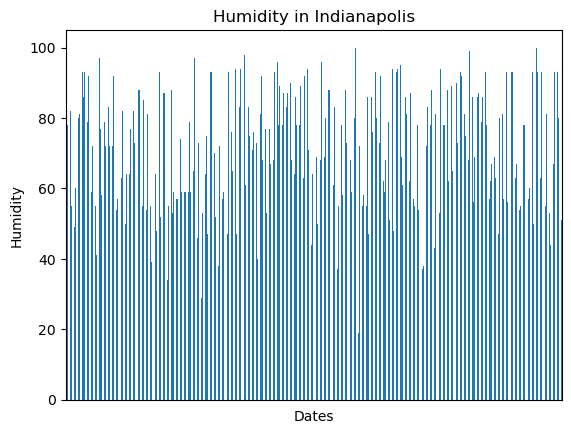

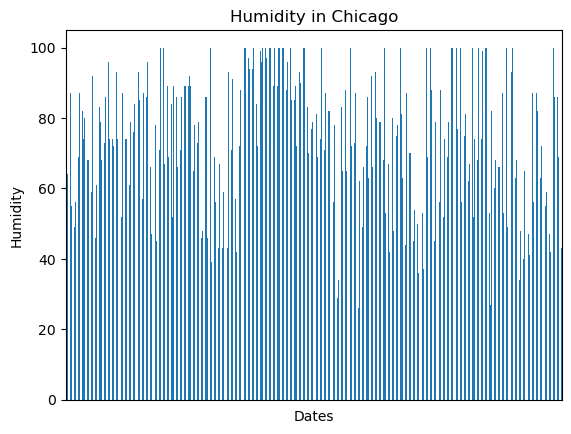

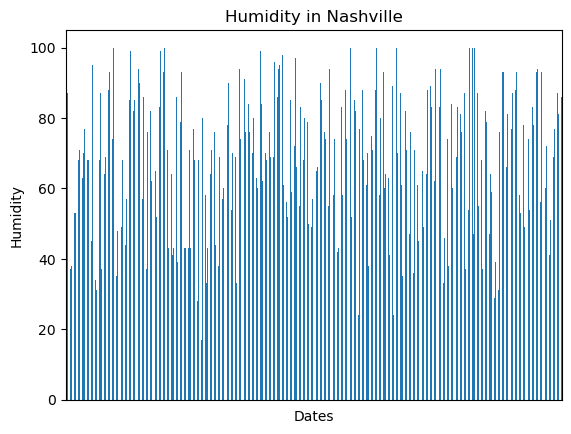

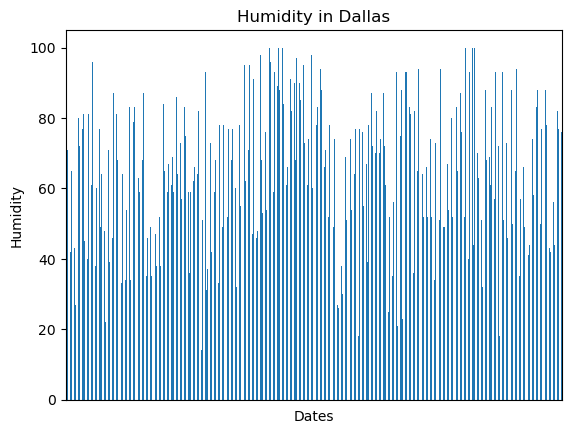

In [23]:
for c in city_selected:
    df_humidity[c].plot.bar()
    plt.title(f"Humidity in {c}")
    plt.xlabel("Dates")
    plt.xticks([])
    plt.ylabel("Humidity")
    plt.show()

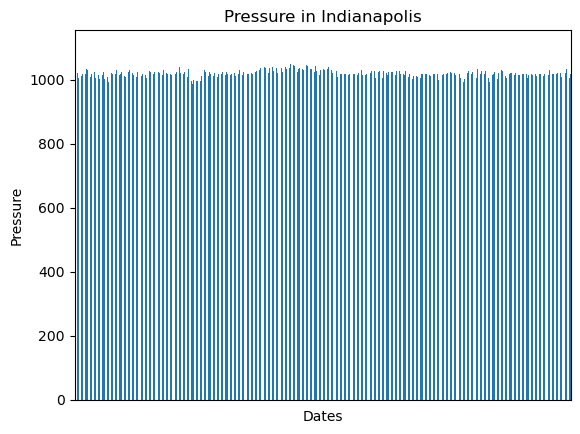

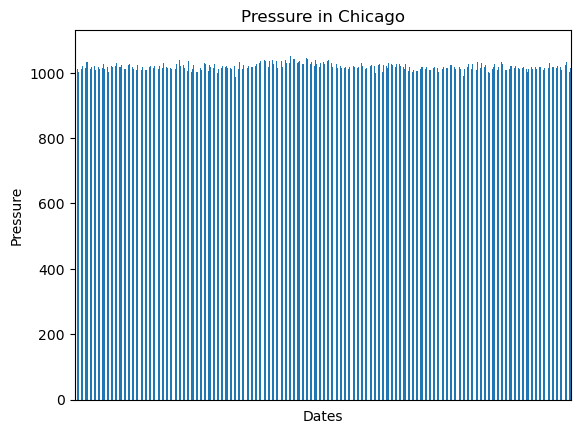

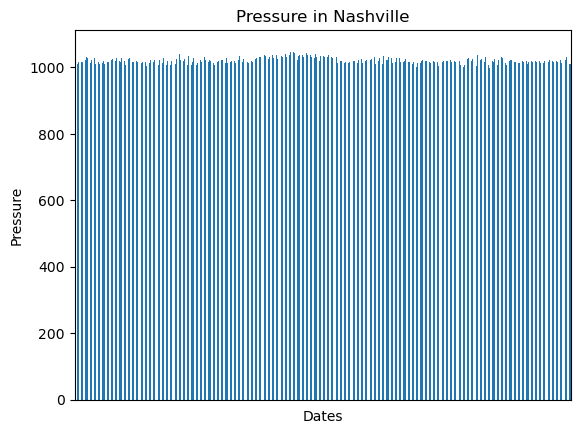

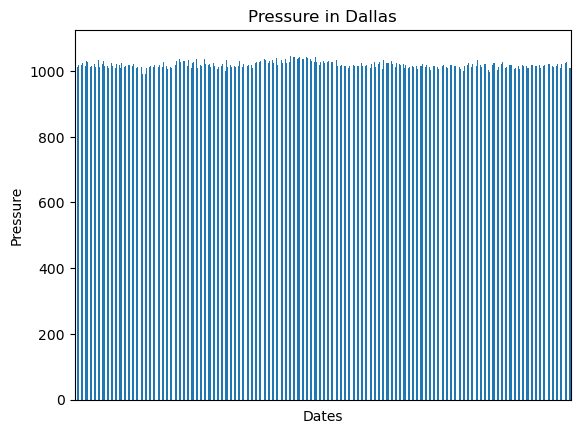

In [24]:
for c in city_selected:
    df_pressure[c].plot.bar()
    plt.title(f"Pressure in {c}")
    plt.xlabel("Dates")
    plt.xticks([])
    plt.ylabel("Pressure")
    plt.show()

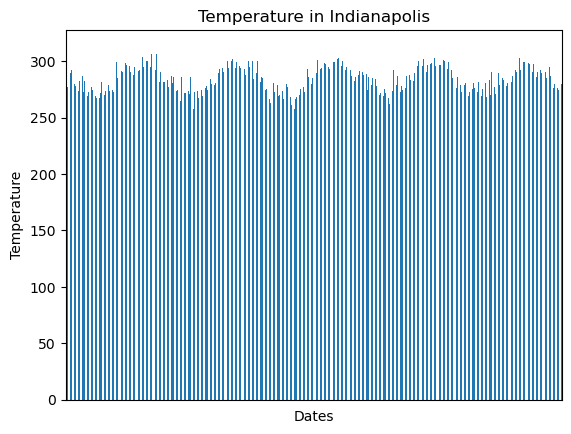

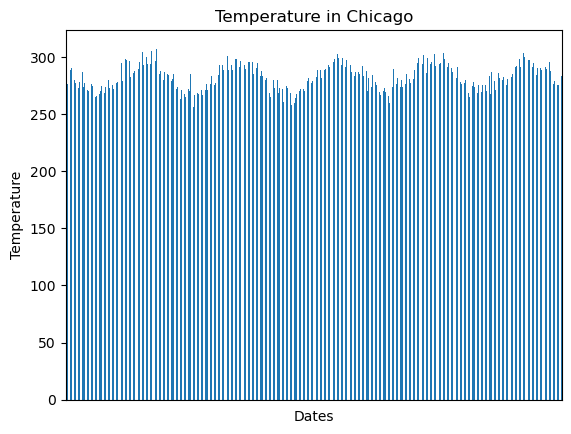

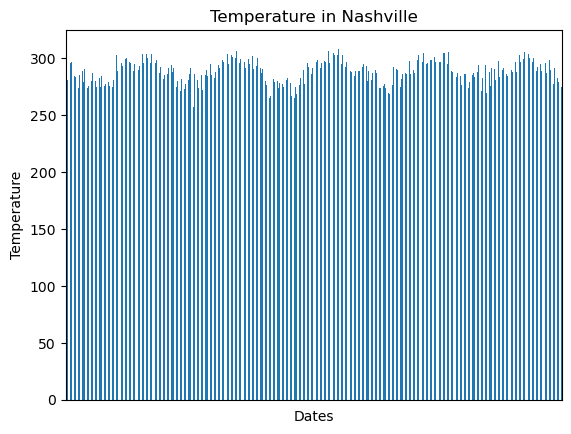

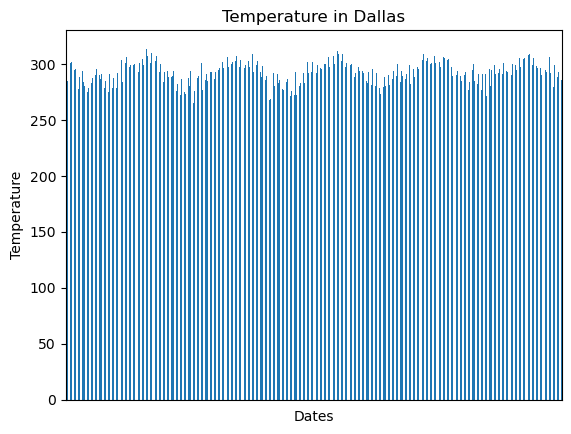

In [25]:
for c in city_selected:
    df_temp[c].plot.bar()
    plt.title(f"Temperature in {c}")
    plt.xlabel("Dates")
    plt.xticks([])
    plt.ylabel("Temperature")
    plt.show()

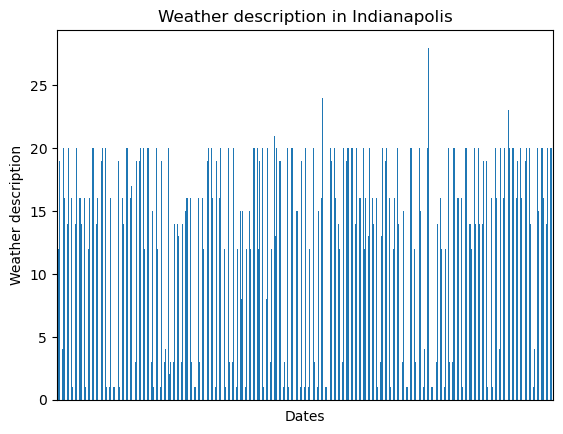

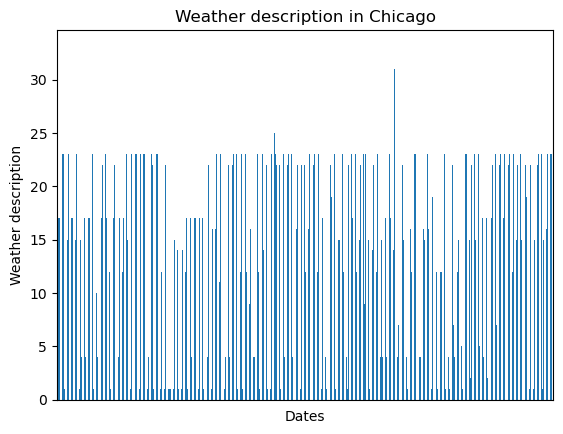

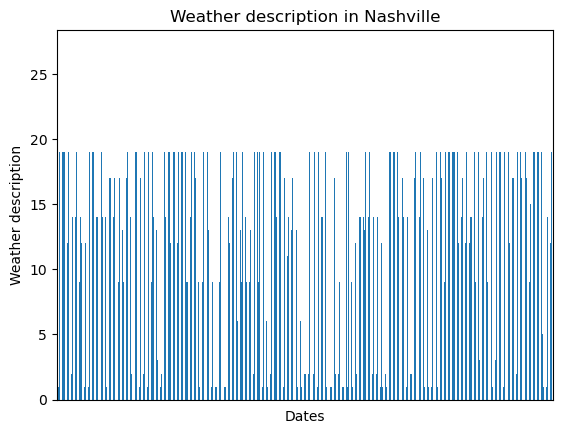

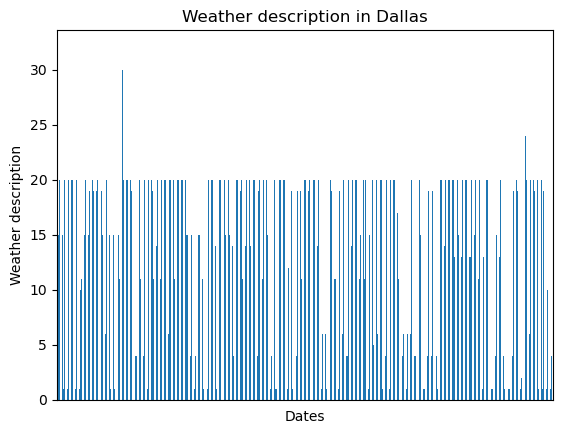

In [26]:
for c in city_selected:
    df_weather_desc[c].plot.bar()
    plt.title(f"Weather description in {c}")
    plt.xlabel("Dates")
    plt.xticks([])
    plt.ylabel("Weather description")
    plt.show()

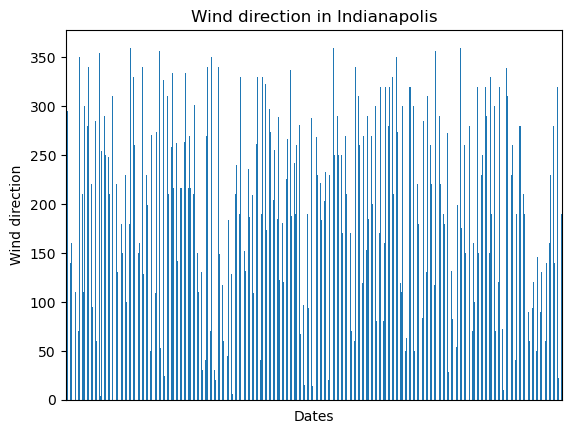

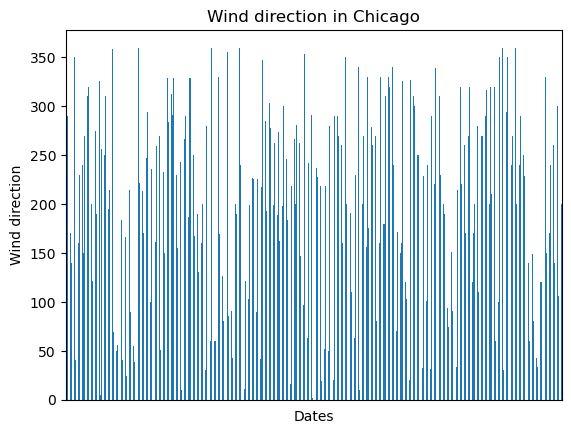

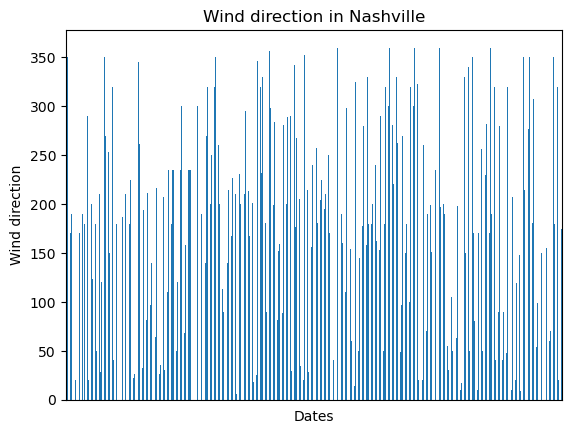

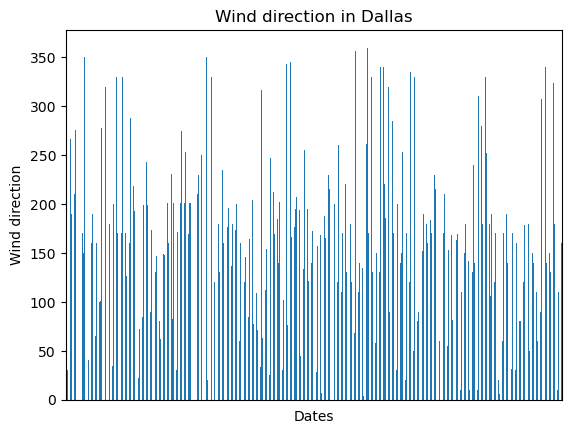

In [27]:
for c in city_selected:
    df_wind_direction[c].plot.bar()
    plt.title(f"Wind direction in {c}")
    plt.xlabel("Dates")
    plt.xticks([])
    plt.ylabel("Wind direction")
    plt.show()

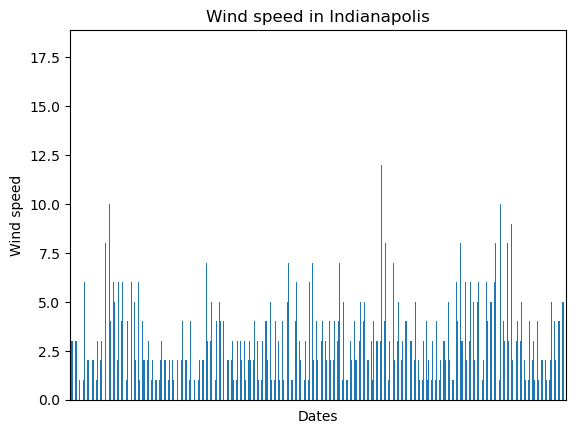

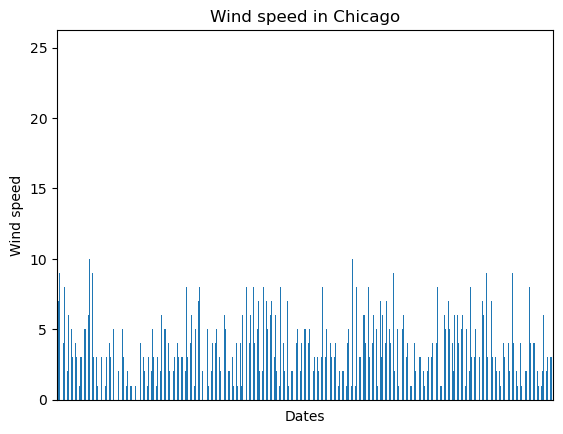

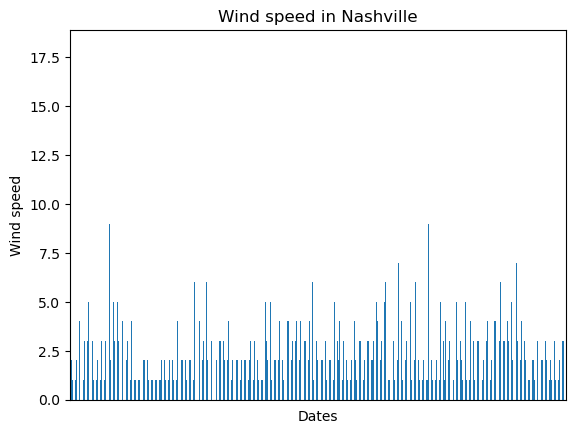

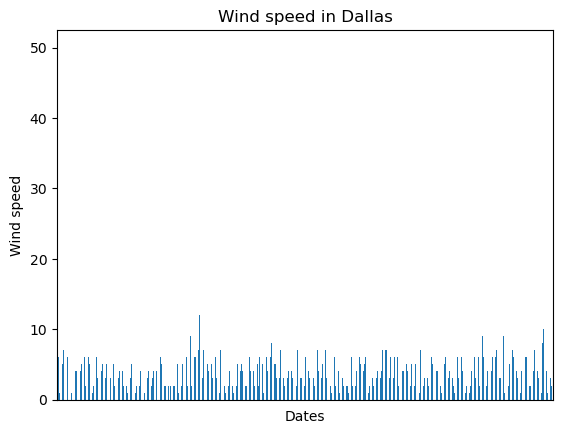

In [28]:
for c in city_selected:
    df_wind_speed[c].plot.bar()
    plt.title(f"Wind speed in {c}")
    plt.xlabel("Dates")
    plt.xticks([])
    plt.ylabel("Wind speed")
    plt.show()